# 210419 Fix Component 6

In [1]:
const COMPONENT = 6;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12135043619137342709\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6449730839827992567\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12135043619137342709\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,1542,29461,Brucella suis,species,53,1,NaN,1,40,5,0.0713532,6,2,suis
2,1664,120576,Brucella pinnipedialis,species,53,1,NaN,1,5,6,0.0540932,4,2,pinnipedialis
3,1665,120577,Brucella ceti,species,53,1,NaN,1,5,7,0.0611273,4,2,ceti
4,515,235,Brucella abortus,species,53,1,NaN,1,132,1,0.046371,0,2,abortus
5,1427,36855,Brucella canis,species,53,1,NaN,1,14,2,0.0191264,0,2,canis
6,1540,29459,Brucella melitensis,species,53,1,NaN,1,65,3,0.0464118,0,1,melitensis
7,1541,29460,Brucella neotomae,species,53,1,NaN,1,2,4,0.00121523,0,3,neotomae


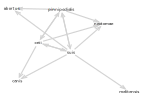

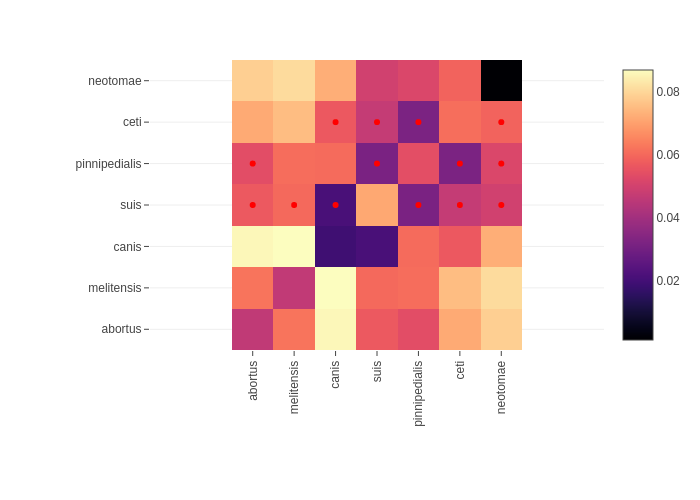

In [3]:
include("fix-component-base.jl");

In [4]:
trees = Dict{String, Any}();

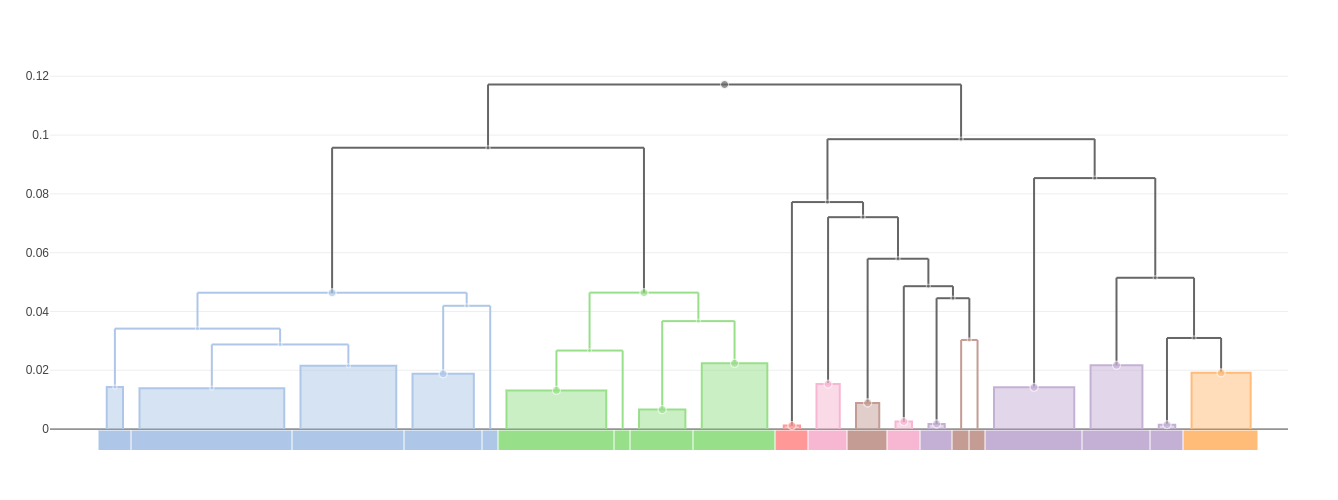

In [5]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa)
plot(dendrogram(cdata, trees["all"]))

## Edits

### suis

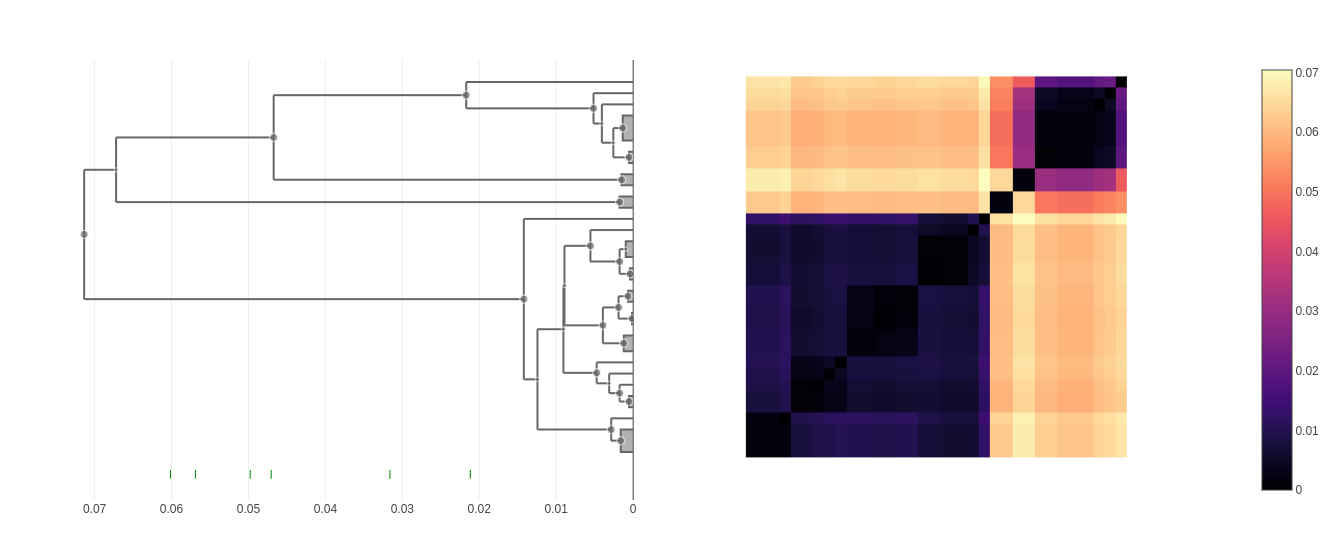

In [6]:
let taxon = "suis"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [7]:
split_taxon!(edits, trees["suis"], [70, 75])

Subgroup 1 size: 10
Subgroup 2 size: 25
Genomes to delete: 5


### pinnipedialis

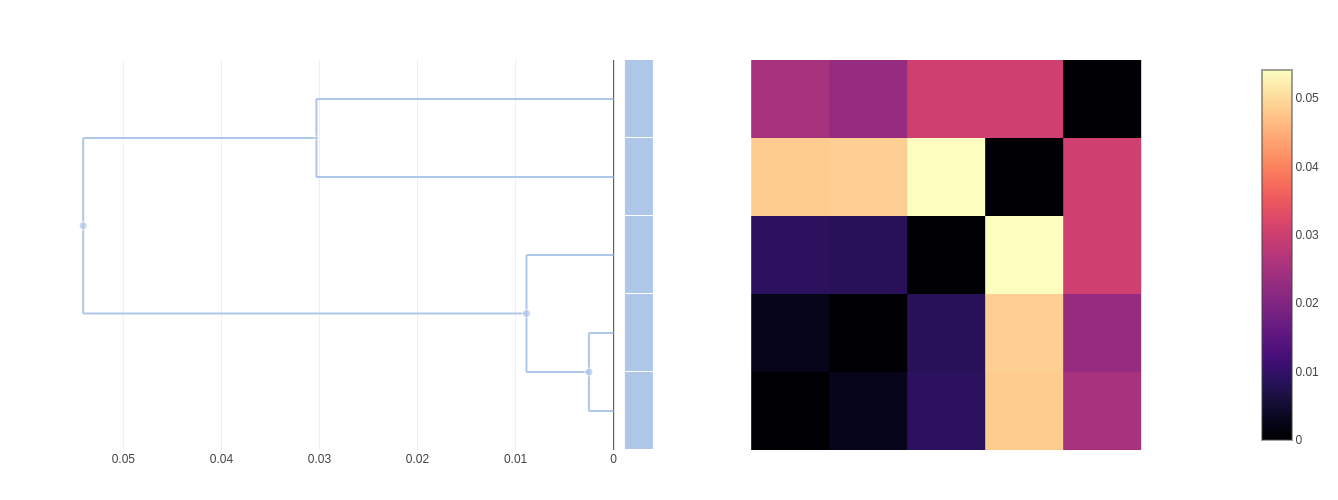

In [8]:
let taxon = "pinnipedialis"
    trees[taxon] = cluster_annotate(cdata, [taxon])
    plot(multi_clustermap(cdata, trees[taxon]))
end

In [9]:
remove_subtrees!(edits, trees["pinnipedialis"], 1)

#6 pinnipedialis:
	1/5 removed
	Diameter 0.0541 => 0.0304


### ceti

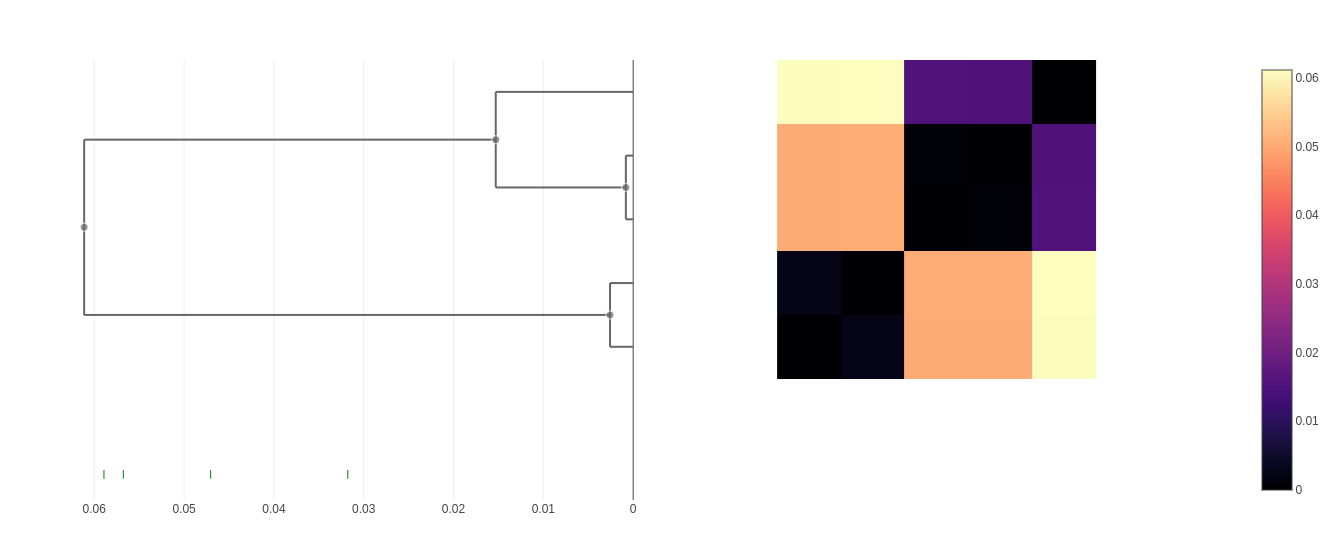

In [10]:
let taxon = "ceti"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [11]:
set_threshold!(edits, "ceti", 0.02)

0.02

## Finish

In [12]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Float64?,String
1,5,suis,40,0.0713532,0,5,"10, 25",missing,"0.0052, 0.0142"
2,6,pinnipedialis,5,0.0540932,0,1,,missing,0.0304
3,7,ceti,5,0.0611273,0,0,,0.02,0.0611
